**Flight Price Prediction**


# Data Undestanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/dataset/economy.csv'
eco_df = pd.read_csv(path)
print(eco_df.head())


         date   airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  SpiceJet      SG      8709    18:55  Delhi    02h 10m   
1  11-02-2022  SpiceJet      SG      8157    06:20  Delhi    02h 20m   
2  11-02-2022   AirAsia      I5       764    04:25  Delhi    02h 10m   
3  11-02-2022   Vistara      UK       995    10:20  Delhi    02h 15m   
4  11-02-2022   Vistara      UK       963    08:50  Delhi    02h 20m   

        stop arr_time      to  price  
0  non-stop     21:05  Mumbai  5,953  
1  non-stop     08:40  Mumbai  5,953  
2  non-stop     06:35  Mumbai  5,956  
3  non-stop     12:35  Mumbai  5,955  
4  non-stop     11:10  Mumbai  5,955  


In [ ]:
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [ ]:
eco_df.shape

(206774, 11)

In [ ]:
eco_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [ ]:
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [ ]:
eco_df.dtypes

,0
date,object
airline,object
ch_code,object
num_code,int64
dep_time,object
from,object
time_taken,object
stop,object
arr_time,object
to,object


In [ ]:
eco_df["class"] = "economy"


In [ ]:
eco_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class'],
      dtype='object')

In [ ]:
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


now we have another data which is of business class bookings,so we import the data here

In [ ]:
path = '/content/drive/MyDrive/dataset/business.csv'
bus_df = pd.read_csv(path)
print(bus_df.head())

         date    airline ch_code  num_code dep_time   from time_taken  \
0  11-02-2022  Air India      AI       868    18:00  Delhi    02h 00m   
1  11-02-2022  Air India      AI       624    19:00  Delhi    02h 15m   
2  11-02-2022  Air India      AI       531    20:00  Delhi    24h 45m   
3  11-02-2022  Air India      AI       839    21:25  Delhi    26h 30m   
4  11-02-2022  Air India      AI       544    17:15  Delhi    06h 40m   

                                                stop arr_time      to   price  
0                                          non-stop     20:00  Mumbai  25,612  
1                                          non-stop     21:15  Mumbai  25,612  
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:45  Mumbai  42,220  
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55  Mumbai  44,450  
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55  Mumbai  46,690  


In [ ]:
bus_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [ ]:
bus_df.shape

(93487, 11)

In [ ]:
bus_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [ ]:
bus_df["class"] = "Business"

In [ ]:
bus_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class'],
      dtype='object')

In [ ]:
bus_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business


Since we have same coulmns in both economy.csv and business.csv i.e eco_df and bus_df,we are consolidating both dataframe in new dataframe which is df.

In [ ]:
df = pd.concat([eco_df,bus_df],ignore_index=True)

In [ ]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [ ]:
df.shape

(300261, 12)

The consolidated dataframe have 3,00,261 rows

# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
date,0
airline,0
ch_code,0
num_code,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df[df.duplicated()]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",economy
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",economy


In [ ]:
# Clean the 'stop' column
df["stop"] = (
    df["stop"]
    .str.replace(r"\s+", " ", regex=True)  # replace multiple spaces/tabs/newlines with single space
    .str.strip()                           # remove leading/trailing spaces
)

# Check unique values after cleaning
print(df["stop"].unique())


['non-stop' '1-stop' '1-stop Via IXU' '1-stop Via Chennai'
 '1-stop Via Indore' '1-stop Via RPR' '2+-stop' '1-stop Via Lucknow'
 '1-stop Via GOP' '1-stop Via Raipur' '1-stop Via Nagpur'
 '1-stop Via Surat' '1-stop Via Hyderabad' '1-stop Via STV'
 '1-stop Via IDR' '1-stop Via VTZ' '1-stop Via Guwahati' '1-stop Via NAG'
 '1-stop Via Vishakhapatnam' '1-stop Via NDC' '1-stop Via IXE'
 '1-stop Via Patna' '1-stop Via PAT' '1-stop Via Mangalore'
 '1-stop Via Mumbai' '1-stop Via KLH' '1-stop Via MYQ'
 '1-stop Via Kolkata' '1-stop Via Delhi' '1-stop Via Kolhapur'
 '1-stop Via JRG' '1-stop Via Bhubaneswar' '1-stop Via Ranchi'
 '1-stop Via IXR' '1-stop Via JGB' '1-stop Via BBI' '1-stop Via Mysore'
 '1-stop Via GAY' '1-stop Via GAU' '1-stop Via HYD']


In [ ]:
df.dtypes

,0
date,object
airline,object
ch_code,object
num_code,int64
dep_time,object
from,object
time_taken,object
stop,object
arr_time,object
to,object


In [ ]:
# Clean stop column into categories
df["stop"] = df["stop"].replace(
    {
        r"^non-stop$": "non-stop",          # exact match
        r"^1-stop.*": "1-stop",             # 1-stop or 1-stop Via ...
        r"^2\+-stop.*": "2-or-more stops"   # 2+ stops
    },
    regex=True
)

# Check unique categories
print(df["stop"].unique())


['non-stop' '1-stop' '2-or-more stops']


In the dtypes we can observe that Price column is object datatype so we convert it into integer(int).

In [ ]:
df["price"] = df["price"].str.replace(',','').astype(int)

In [ ]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economy


In [ ]:
df.dtypes

,0
date,object
airline,object
ch_code,object
num_code,int64
dep_time,object
from,object
time_taken,object
stop,object
arr_time,object
to,object


In [ ]:
df['date'].unique()

array(['11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03-2022',
       '07-03-2022', '08-03-2022', '09-03-2022', '10-03-2022',
       '11-03-2022', '12-03-2022', '13-03-2022', '14-03-2022',
       '15-03-2022', '16-03-2022', '17-03-2022', '18-03-2022',
       '19-03-2022', '20-03-2022', '21-03-2022', '22-03-2022',
       '23-03-2022', '24-03-2022', '25-03-2022', '26-03-2022',
       '27-03-2022', '28-03-2022', '29-03-2022', '30-03-2022',
       '31-03-2022'], dtype=object)

In [ ]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [ ]:
df['ch_code'].unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '2T', 'S5'], dtype=object)

In [ ]:
df['dep_time'].unique()

array(['18:55', '06:20', '04:25', '10:20', '08:50', '11:40', '09:30',
       '14:20', '08:00', '15:00', '10:30', '07:15', '12:00', '08:45',
       '07:00', '19:00', '06:25', '05:50', '19:25', '17:50', '15:30',
       '17:15', '08:20', '19:45', '18:40', '06:05', '13:50', '17:35',
       '16:05', '14:15', '09:05', '08:05', '04:55', '19:20', '21:35',
       '13:30', '09:45', '06:10', '21:15', '17:00', '17:45', '13:20',
       '20:40', '09:50', '15:50', '14:05', '18:00', '10:15', '21:50',
       '14:45', '16:55', '06:30', '19:50', '15:55', '12:45', '12:50',
       '20:35', '20:15', '09:10', '16:15', '07:45', '07:20', '17:05',
       '17:10', '19:55', '20:00', '07:30', '17:30', '21:25', '17:40',
       '09:15', '12:10', '06:50', '11:50', '10:35', '17:25', '11:20',
       '19:40', '21:00', '18:50', '10:50', '14:30', '05:15', '08:10',
       '13:40', '12:55', '10:00', '10:25', '22:15', '10:55', '15:45',
       '06:00', '16:40', '16:50', '07:10', '13:15', '14:10', '11:10',
       '07:05', '11:

“Performed feature engineering on departure_time by categorizing it into time-of-day segments—Early Morning, Morning, Afternoon, Evening, Night, and Late Night—based on the respective time zones.”

In [ ]:
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    if 4 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

df['dep_time'] = df['dep_time'].apply(categorize_time)
display(df.head())

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG,8157,Early Morning,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5,764,Early Morning,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economy
3,11-02-2022,Vistara,UK,995,Morning,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economy
4,11-02-2022,Vistara,UK,963,Morning,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economy


In [ ]:
df.ch_code.shape

(300261,)

In [ ]:
df.shape

(300261, 12)

In [ ]:
df.num_code.shape

(300261,)

we are concating ch_code and num_code together and making as flight_code

In [ ]:
df['flight_code'] = df['ch_code'] + df['num_code'].astype(str)

# Reorder columns to place 'flight_code' after 'airline'
cols = df.columns.tolist()
cols.insert(cols.index('airline') + 1, cols.pop(cols.index('flight_code')))
df = df[cols]

display(df.head())

,date,airline,flight_code,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG8709,SG,8709,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG8157,SG,8157,Early Morning,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5764,I5,764,Early Morning,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economy
3,11-02-2022,Vistara,UK995,UK,995,Morning,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economy
4,11-02-2022,Vistara,UK963,UK,963,Morning,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economy


renaming the from - column as source, and to-column as Destination

In [ ]:

df = df.rename(columns={'from': 'source'})
df = df.rename(columns={'to': 'destination'})


In [ ]:
df.head()

,date,airline,flight_code,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,class
0,11-02-2022,SpiceJet,SG8709,SG,8709,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG8157,SG,8157,Early Morning,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5764,I5,764,Early Morning,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economy
3,11-02-2022,Vistara,UK995,UK,995,Morning,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economy
4,11-02-2022,Vistara,UK963,UK,963,Morning,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economy


In [ ]:
display(df['time_taken'].unique())

array(['02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
       '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
       '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
       '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
       '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
       '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
       '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
       '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
       '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
       '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
       '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
       '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
       '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
       '22h 45m', '06h 20m', '07h 15m', '30h 05m', 

clenaing the time_taken column and converting time in decimal format.

In [ ]:
def convert_time_taken(time_str):
    if pd.isna(time_str):  # handle NaN
        return np.nan
    hours = 0
    minutes = 0
    time_str = str(time_str)  # make sure it’s a string
    # Clean the string
    time_str = time_str.replace('h m', '').replace('h', ' ').replace('m', '')
    parts = time_str.split()  # cleaned list like ['2','10']

    try:
        if len(parts) > 0:
            hours = float(parts[0]) if '.' in parts[0] else int(parts[0])
        if len(parts) > 1:
            minutes = int(parts[1])
    except ValueError:
        print(f"Could not parse time_taken: {time_str}")
        return np.nan

    return round(hours + minutes / 60, 2)

# Apply the function
df['time_taken'] = df['time_taken'].apply(convert_time_taken)

display(df.head())


,date,airline,flight_code,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,class
0,11-02-2022,SpiceJet,SG8709,SG,8709,Evening,Delhi,2.17,non-stop,21:05,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG8157,SG,8157,Early Morning,Delhi,2.33,non-stop,08:40,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5764,I5,764,Early Morning,Delhi,2.17,non-stop,06:35,Mumbai,5956,economy
3,11-02-2022,Vistara,UK995,UK,995,Morning,Delhi,2.25,non-stop,12:35,Mumbai,5955,economy
4,11-02-2022,Vistara,UK963,UK,963,Morning,Delhi,2.33,non-stop,11:10,Mumbai,5955,economy


Now as the same way how we feature engineering for the departure_time we are doing for arrival_time as well.  

In [ ]:
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    if 4 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

df['arr_time'] = df['arr_time'].apply(categorize_time)
display(df.head())

,date,airline,flight_code,ch_code,num_code,dep_time,source,time_taken,stop,arr_time,destination,price,class
0,11-02-2022,SpiceJet,SG8709,SG,8709,Evening,Delhi,2.17,non-stop,Night,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG8157,SG,8157,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5764,I5,764,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,5956,economy
3,11-02-2022,Vistara,UK995,UK,995,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,5955,economy
4,11-02-2022,Vistara,UK963,UK,963,Morning,Delhi,2.33,non-stop,Morning,Mumbai,5955,economy


In [ ]:
df['class'].unique()

array(['economy', 'Business'], dtype=object)

In [ ]:
df['class'].value_counts()

,count
class,
economy,206774
Business,93487


Now finally we are removing the unwanted columns from the dataframe i.e(ch_code,num_code)

In [ ]:
df = df.drop(['ch_code', 'num_code'], axis=1)

In [ ]:
df = df.rename(columns = {'time_taken' : 'duration'})

re-ordering the columns i.e class,and we are getting the cleaned data.

In [ ]:
cols = df.columns.tolist()
price_index = cols.index('price')
class_index = cols.index('class')

# Remove 'class' from its current position
cols.pop(class_index)

# Insert 'class' before 'price'
cols.insert(price_index, 'class')

df = df[cols]

display(df.head())

,date,airline,flight_code,dep_time,source,duration,stop,arr_time,destination,class,price
0,11-02-2022,SpiceJet,SG8709,Evening,Delhi,2.17,non-stop,Night,Mumbai,economy,5953
1,11-02-2022,SpiceJet,SG8157,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
2,11-02-2022,AirAsia,I5764,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,economy,5956
3,11-02-2022,Vistara,UK995,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,economy,5955
4,11-02-2022,Vistara,UK963,Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5955


we are moving df to newdf

In [ ]:
newdf = df

In [ ]:
newdf.head()

,date,airline,flight_code,dep_time,source,duration,stop,arr_time,destination,class,price
0,11-02-2022,SpiceJet,SG8709,Evening,Delhi,2.17,non-stop,Night,Mumbai,economy,5953
1,11-02-2022,SpiceJet,SG8157,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
2,11-02-2022,AirAsia,I5764,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,economy,5956
3,11-02-2022,Vistara,UK995,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,economy,5955
4,11-02-2022,Vistara,UK963,Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5955


In [ ]:
newdf.head()

,date,airline,flight_code,dep_time,source,duration,stop,arr_time,destination,class,price
0,11-02-2022,SpiceJet,SG8709,Evening,Delhi,2.17,non-stop,Night,Mumbai,economy,5953
1,11-02-2022,SpiceJet,SG8157,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
2,11-02-2022,AirAsia,I5764,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,economy,5956
3,11-02-2022,Vistara,UK995,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,economy,5955
4,11-02-2022,Vistara,UK963,Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5955


In [ ]:
duplicates = newdf[newdf.duplicated(keep=False)]
duplicates.sort_values(by=newdf.columns.tolist()).head(20)  # show first 20 neatly

,date,airline,flight_code,dep_time,source,duration,stop,arr_time,destination,class,price
6080,13-03-2022,Air India,AI475,Afternoon,Delhi,24.58,1-stop,Afternoon,Mumbai,economy,4780
6181,13-03-2022,Air India,AI475,Afternoon,Delhi,24.58,1-stop,Afternoon,Mumbai,economy,4780
516,14-02-2022,Air India,AI807,Evening,Delhi,15.25,1-stop,Morning,Mumbai,economy,12150
563,14-02-2022,Air India,AI807,Evening,Delhi,15.25,1-stop,Morning,Mumbai,economy,12150


In [ ]:
newdf.duplicated().sum()

np.int64(2)

In [ ]:
newdf[newdf.duplicated()]

,date,airline,flight_code,dep_time,source,duration,stop,arr_time,destination,class,price
563,14-02-2022,Air India,AI807,Evening,Delhi,15.25,1-stop,Morning,Mumbai,economy,12150
6181,13-03-2022,Air India,AI475,Afternoon,Delhi,24.58,1-stop,Afternoon,Mumbai,economy,4780


In [ ]:
newdf.drop_duplicates(inplace=True)

In [ ]:
newdf.duplicated().sum()

np.int64(0)

In [ ]:
newdf.shape

(300259, 11)

In [ ]:
newdf.dtypes

,0
date,object
airline,object
flight_code,object
dep_time,object
source,object
duration,float64
stop,object
arr_time,object
destination,object
class,object


**Outliers Detection & Treatment.**

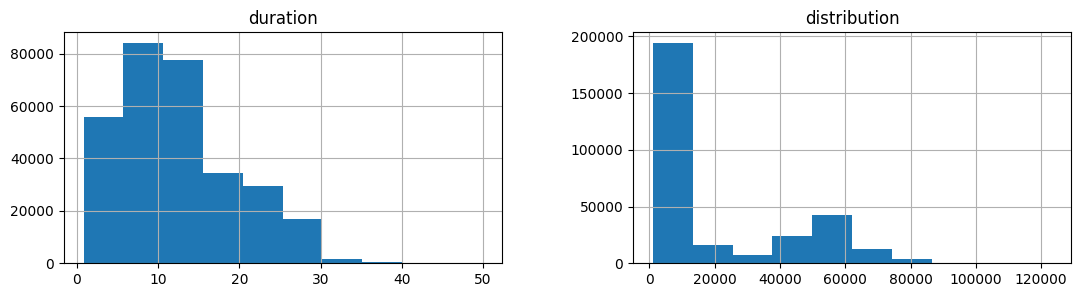

In [ ]:
newdf.hist(figsize=(13,3))
plt.title('distribution')
plt.show()

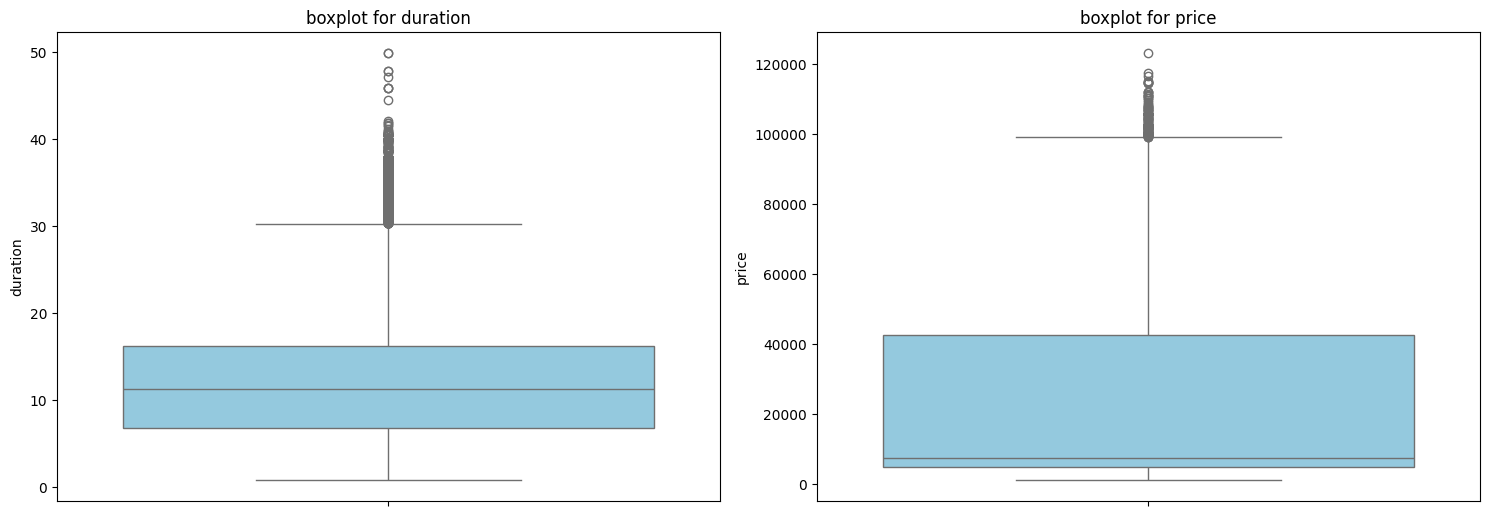

In [ ]:
numerical_features = ['duration','price']
plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_features,1):
  plt.subplot(3,2,i)
  sns.boxplot(y=newdf[col],color='skyblue')
  plt.title(f'boxplot for {col}')
  plt.tight_layout()
plt.show()

In [ ]:
newdf['duration'].max()

49.83

**Intepretation**

**capping duration column** : “Capped duration at 20 hours because domestic flights in India rarely exceed this limit; extreme values like 30–49 hrs are considered unrealistic.”

**Domain knowledge**: Domestic flights in India almost never exceed 20 hours.

**Data quality**: Those 30–49 hr durations are clearly data entry errors or extreme outliers.

**Model impact**: Removing them entirely would throw away 50k rows (~17% of data), which is too much.

Capping keeps the data realistic without losing size.

In [ ]:
newdf['duration'] = newdf['duration'].clip(upper=20)
print(f"Max duration after capping: {newdf['duration'].max()}")
print(newdf.shape)


Max duration after capping: 20.0
(300259, 11)


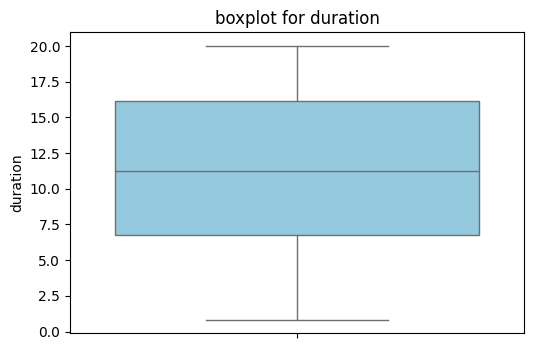

In [ ]:
numerical_features = ['duration']
plt.figure(figsize=(10,10))
for i,col in enumerate(numerical_features,1):
  plt.subplot(3,2,i)
  sns.boxplot(y=newdf[col],color='skyblue')
  plt.title(f'boxplot for {col}')
  plt.tight_layout()
plt.show()

In [ ]:
newdf['price'].max()

123071

In [ ]:
# Filter rows where price >= 1,00,000
high_price_rows = newdf[newdf['price'] >= 100000]

# Show the first 10 rows
print(high_price_rows.head(10))

# Optional: see how many such rows
print(f"Number of flights with price >= 1 lakh: {high_price_rows.shape[0]}")


              date  airline flight_code       dep_time source  duration  \
215966  11-02-2022  Vistara       UK809        Evening  Delhi     20.00   
215967  11-02-2022  Vistara       UK809        Evening  Delhi     20.00   
216133  14-02-2022  Vistara       UK817      Afternoon  Delhi     17.58   
216203  15-02-2022  Vistara       UK963        Morning  Delhi      8.00   
216204  15-02-2022  Vistara       UK811  Early Morning  Delhi     10.92   
216275  16-02-2022  Vistara       UK927        Morning  Delhi      7.33   
216415  18-02-2022  Vistara       UK811  Early Morning  Delhi     10.92   
216416  18-02-2022  Vistara       UK811  Early Morning  Delhi     14.00   
216548  20-02-2022  Vistara       UK811  Early Morning  Delhi     10.92   
216549  20-02-2022  Vistara       UK813        Evening  Delhi     16.08   

                   stop   arr_time destination     class   price  
215966  2-or-more stops  Afternoon     Kolkata  Business  114434  
215967  2-or-more stops  Afternoon     K

In [ ]:
newdf['price'] = newdf['price'].clip(upper=35000)
print(f"Max price after capping: {newdf['price'].max()}")

Max price after capping: 35000


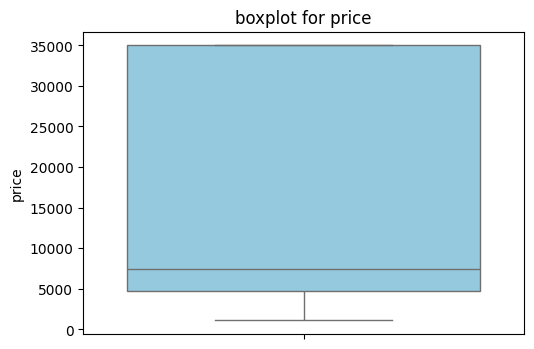

In [ ]:
numerical_features = ['price']
plt.figure(figsize=(10,10))
for i,col in enumerate(numerical_features,1):
  plt.subplot(3,2,i)
  sns.boxplot(y=newdf[col],color='skyblue')
  plt.title(f'boxplot for {col}')
  plt.tight_layout()
plt.show()

In [ ]:
newdf.head()

,date,airline,flight_code,dep_time,source,duration,stop,arr_time,destination,class,price
0,11-02-2022,SpiceJet,SG8709,Evening,Delhi,2.17,non-stop,Night,Mumbai,economy,5953
1,11-02-2022,SpiceJet,SG8157,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
2,11-02-2022,AirAsia,I5764,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,economy,5956
3,11-02-2022,Vistara,UK995,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,economy,5955
4,11-02-2022,Vistara,UK963,Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5955


In [ ]:
newdf.shape

(300259, 11)

In [ ]:
newdf = newdf.drop(['flight_code'],axis=1)

In [ ]:
# Check all exact duplicate rows
duplicate_rows = newdf[newdf.duplicated(keep=False)]
display(duplicate_rows.head(10))



,date,airline,dep_time,source,duration,stop,arr_time,destination,class,price
35,11-02-2022,Vistara,Morning,Delhi,20.00,1-stop,Morning,Mumbai,economy,12150
36,11-02-2022,Vistara,Morning,Delhi,20.00,1-stop,Morning,Mumbai,economy,12150
133,12-02-2022,Indigo,Evening,Delhi,2.17,non-stop,Evening,Mumbai,economy,5955
134,12-02-2022,Indigo,Evening,Delhi,2.17,non-stop,Evening,Mumbai,economy,5955
220,12-02-2022,Vistara,Evening,Delhi,20.00,1-stop,Night,Mumbai,economy,15353
221,12-02-2022,Vistara,Evening,Delhi,20.00,1-stop,Night,Mumbai,economy,15353
233,12-02-2022,Vistara,Evening,Delhi,20.00,1-stop,Evening,Mumbai,economy,17348
234,12-02-2022,Vistara,Evening,Delhi,20.00,1-stop,Evening,Mumbai,economy,17348
400,14-02-2022,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
401,14-02-2022,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953


In [ ]:
newdf.duplicated().sum()

np.int64(19151)

In [ ]:
# Drop exact duplicates
newdf = newdf.drop_duplicates()

# Verify
print(f"Number of duplicate rows after removal: {newdf.duplicated().sum()}")


Number of duplicate rows after removal: 0


In [ ]:
newdf.shape

(281108, 10)

# Encoding categorical variables

Implementing categorical encoding for airline,dep_time,source,stop,arr_time,destination,class.

In [ ]:
newdf.head()

,date,airline,dep_time,source,duration,stop,arr_time,destination,class,price
0,11-02-2022,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,economy,5953
1,11-02-2022,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
2,11-02-2022,AirAsia,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,economy,5956
3,11-02-2022,Vistara,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,economy,5955
4,11-02-2022,Vistara,Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5955


one-hot encoding for airline,source,destination

In [ ]:
new_df = newdf.copy()

In [ ]:
new_df.head()

,date,airline,dep_time,source,duration,stop,arr_time,destination,class,price
0,11-02-2022,SpiceJet,Evening,Delhi,2.17,non-stop,Night,Mumbai,economy,5953
1,11-02-2022,SpiceJet,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5953
2,11-02-2022,AirAsia,Early Morning,Delhi,2.17,non-stop,Early Morning,Mumbai,economy,5956
3,11-02-2022,Vistara,Morning,Delhi,2.25,non-stop,Afternoon,Mumbai,economy,5955
4,11-02-2022,Vistara,Morning,Delhi,2.33,non-stop,Morning,Mumbai,economy,5955


In [ ]:
# One-hot encode categorical features
new_df = pd.get_dummies(newdf, columns=['airline', 'source', 'destination'], drop_first=True)

# Convert only boolean columns to int (0/1)
bool_cols = new_df.select_dtypes(include=['bool']).columns
new_df[bool_cols] = new_df[bool_cols].astype(int)

display(new_df.head())


,date,dep_time,duration,stop,arr_time,class,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,source_Chennai,source_Delhi,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,11-02-2022,Evening,2.17,non-stop,Night,economy,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,11-02-2022,Early Morning,2.33,non-stop,Morning,economy,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,11-02-2022,Early Morning,2.17,non-stop,Early Morning,economy,5956,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,11-02-2022,Morning,2.25,non-stop,Afternoon,economy,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,11-02-2022,Morning,2.33,non-stop,Morning,economy,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1


Implementing label encoding via mapping for stop , class ,       dep_time , arr_time.

In [ ]:
stop_mapping = {
    "non-stop": 0,
    "1-stop": 1,
    "2-or-more stops": 2
}

new_df['stop'] = new_df['stop'].map(stop_mapping)


In [ ]:
class_mapping = {
    "economy": 0,
    "Business": 1
}

new_df['class'] = new_df['class'].map(class_mapping)

In [ ]:
dep_time_mapping = {
    'Early Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late Night': 5
}
new_df['dep_time'] = new_df['dep_time'].map(dep_time_mapping)

In [ ]:
arr_time_mapping = {
    'Early Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late Night': 5
}
new_df['arr_time'] = new_df['arr_time'].map(arr_time_mapping)

In [ ]:
new_df.columns

Index(['date', 'dep_time', 'duration', 'stop', 'arr_time', 'class', 'price',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'source_Chennai', 'source_Delhi', 'source_Hyderabad',
       'source_Kolkata', 'source_Mumbai', 'destination_Chennai',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_Mumbai'],
      dtype='object')

# Feature Scaling

**“Applied Robust Scaling on duration and price since both columns contained several outliers. As the duration values were capped at a threshold and price also showed skewness, RobustScaler was chosen to effectively handle these outliers and normalize the data.”**

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
new_df['duration_scaled'] = scaler.fit_transform(newdf[['duration']])


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()
new_df['price_scaled'] = scaler2.fit_transform(newdf[['price']])

In [ ]:
new_df.head()

,date,dep_time,duration,stop,arr_time,class,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,duration_scaled,price_scaled
0,11-02-2022,3,2.17,0,4,0,5953,0,0,0,...,0,0,0,0,0,0,0,1,-1.009324,-0.042514
1,11-02-2022,0,2.33,0,1,0,5953,0,0,0,...,0,0,0,0,0,0,0,1,-0.990676,-0.042514
2,11-02-2022,0,2.17,0,0,0,5956,1,0,0,...,0,0,0,0,0,0,0,1,-1.009324,-0.042415
3,11-02-2022,1,2.25,0,2,0,5955,0,0,0,...,0,0,0,0,0,0,0,1,-1.000000,-0.042448
4,11-02-2022,1,2.33,0,1,0,5955,0,0,0,...,0,0,0,0,0,0,0,1,-0.990676,-0.042448


In [ ]:
new_df.columns

Index(['date', 'dep_time', 'duration', 'stop', 'arr_time', 'class', 'price',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'source_Chennai', 'source_Delhi', 'source_Hyderabad',
       'source_Kolkata', 'source_Mumbai', 'destination_Chennai',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_Mumbai', 'duration_scaled', 'price_scaled'],
      dtype='object')

remove duration,price columns as they are redundent

In [ ]:
new_df = new_df.drop(['duration','price'],axis=1)


In [ ]:
new_df.head()

,date,dep_time,stop,arr_time,class,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,...,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,duration_scaled,price_scaled
0,11-02-2022,3,0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,-1.009324,-0.042514
1,11-02-2022,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,-0.990676,-0.042514
2,11-02-2022,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.009324,-0.042415
3,11-02-2022,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.000000,-0.042448
4,11-02-2022,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.990676,-0.042448


In [ ]:
new_df['journey_day'] = pd.to_datetime(new_df['date'], format="%d-%m-%Y").dt.day
new_df['journey_month'] = pd.to_datetime(new_df['date'], format="%d-%m-%Y").dt.month


In [ ]:
new_df = new_df.drop(['date'],axis=1)

In [ ]:
new_df.head()

,dep_time,stop,arr_time,class,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,...,source_Mumbai,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,duration_scaled,price_scaled,journey_day,journey_month
0,3,0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,1,-1.009324,-0.042514,11,2
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,-0.990676,-0.042514,11,2
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,-1.009324,-0.042415,11,2
3,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,-1.000000,-0.042448,11,2
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,-0.990676,-0.042448,11,2


implemented cyclindrical encoding for journey_day,and journey_month by using sine and cosine transfornations helps the model to capture the day and month(dates) effectively.

In [ ]:
import numpy as np

# Day (1–31)
new_df['journey_day_sin'] = np.sin(2 * np.pi * new_df['journey_day'] / 31)
new_df['journey_day_cos'] = np.cos(2 * np.pi * new_df['journey_day'] / 31)

# Month (1–12)
new_df['journey_month_sin'] = np.sin(2 * np.pi * new_df['journey_month'] / 12)
new_df['journey_month_cos'] = np.cos(2 * np.pi * new_df['journey_month'] / 12)

# Optional: drop original columns if you want
new_df = new_df.drop(columns=['journey_day', 'journey_month'])

# Check result
new_df.head()


,dep_time,stop,arr_time,class,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,...,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,duration_scaled,price_scaled,journey_day_sin,journey_day_cos,journey_month_sin,journey_month_cos
0,3,0,4,0,0,0,0,1,0,0,...,0,0,0,1,-1.009324,-0.042514,0.790776,-0.612106,0.866025,0.5
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,-0.990676,-0.042514,0.790776,-0.612106,0.866025,0.5
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,-1.009324,-0.042415,0.790776,-0.612106,0.866025,0.5
3,1,0,2,0,0,0,0,0,0,0,...,0,0,0,1,-1.000000,-0.042448,0.790776,-0.612106,0.866025,0.5
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,-0.990676,-0.042448,0.790776,-0.612106,0.866025,0.5


In [ ]:
new_df.columns


Index(['dep_time', 'stop', 'arr_time', 'class', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'source_Chennai', 'source_Delhi', 'source_Hyderabad', 'source_Kolkata',
       'source_Mumbai', 'destination_Chennai', 'destination_Delhi',
       'destination_Hyderabad', 'destination_Kolkata', 'destination_Mumbai',
       'duration_scaled', 'price_scaled', 'journey_day_sin', 'journey_day_cos',
       'journey_month_sin', 'journey_month_cos'],
      dtype='object')

# Model devlopment

In [ ]:
X = new_df.drop('price_scaled', axis = 1)
y = new_df['price_scaled']

-->As the Target variable is price we droped price_scaled and keeping remainning columns for trainning and testing.

--> from model_selection we imported train_test_split for trainning the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Performance:
Mean Absolute Error (MAE): 0.061956826979200276
Mean Squared Error (MSE): 0.007706361935724187
R2 Score: 0.9588743062307277


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
model2 = DecisionTreeRegressor(random_state=42, max_depth=10)  # max_depth to avoid overfitting

# Train model
model2.fit(X_train, y_train)

# Predict
y_pred = model2.predict(X_test)

# Evaluate
print("Decision Tree Regressor Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 0.03217813799291331
Mean Squared Error (MSE): 0.003509135690963437
R2 Score: 0.9812731816874074


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
model3 = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)  # 100 trees

# Train model
model3.fit(X_train, y_train)

# Predict
y_pred = model3.predict(X_test)

# Evaluate
print("Random Forest Regressor Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 0.03182210290386973
Mean Squared Error (MSE): 0.003407484233204891
R2 Score: 0.9818156538367622


**KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
model4 = KNeighborsRegressor(n_neighbors=5)  # you can tune k

# Train model
model4.fit(X_train, y_train)

# Predict
y_pred = model4.predict(X_test)

# Evaluate
print("KNN Regressor Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


KNN Regressor Performance:
Mean Absolute Error (MAE): 0.029751491143924856
Mean Squared Error (MSE): 0.0037847730652379925
R2 Score: 0.9798022180420026


**Interpretation**

--> Among all tested models, the Random Forest Regressor performs the best.

--> It achieved a low MAE (0.029) and MSE (0.0037), which indicates that the prediction errors are small and the model’s predictions are close to the actual values.

-->The R² Score of 0.97 shows that the model explains 97% of the variance in the target variable, meaning it captures the underlying patterns in the data very well.

-->Therefore, the Random Forest Regressor is the most reliable model for predicting prices in this dataset.

**Prediction Output**

In [ ]:
# Duration scaling
duration_val = pd.DataFrame({'duration': [120]})
duration_scaled = scaler.transform(duration_val)[0][0]

new_flight = pd.DataFrame([{
    'dep_time': 2,   # Afternoon
    'stop': 1,       # 1 stop
    'arr_time': 3,   # Evening
    'class': 0,      # Economy
    'airline_AirAsia': 1,
    'airline_GO FIRST': 0,
    'airline_Indigo': 0,
    'airline_SpiceJet': 0,
    'airline_StarAir': 0,
    'airline_Trujet': 0,
    'airline_Vistara': 0,
    'source_Chennai': 1,
    'source_Delhi': 0,
    'source_Hyderabad': 0,
    'source_Kolkata': 0,
    'source_Mumbai': 0,
    'destination_Chennai': 0,
    'destination_Delhi': 0,
    'destination_Hyderabad': 0,
    'destination_Kolkata': 0,
    'destination_Mumbai': 1,
    'duration_scaled': duration_scaled,
    'journey_day_sin': np.sin(2*np.pi*15/31),
    'journey_day_cos': np.cos(2*np.pi*15/31),
    'journey_month_sin': np.sin(2*np.pi*3/12),
    'journey_month_cos': np.cos(2*np.pi*3/12)
}])

predicted_price_scaled = model3.predict(new_flight)[0]
predicted_price_actual = scaler2.inverse_transform([[predicted_price_scaled]])[0][0]

print(f"💰 Predicted Flight Price: ₹{predicted_price_actual:.2f}")


💰 Predicted Flight Price: ₹6088.20


# Saving the Model & Scaling feature into a pickle file

In [ ]:
import pickle

# Save model
with open("model3.pkl", "wb") as f:
    pickle.dump(model4, f)

# Save scalers
with open("robust1_scaler_flight.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("robust2_scaler_flight.pkl", "wb") as f:
    pickle.dump(scaler2, f)